In [184]:
from google.colab import drive
drive.mount('/content/drive')





Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
dataset  modele_visage.h5  processed_data  Projet_DeepLearning_MDSMS1.ipynb


In [160]:
import os

base_path = "/content/drive/MyDrive/Projet_DeepLearning/dataset/"
print("Dossiers(image) :", os.listdir(base_path))

Dossiers(image) : ['BEINDI', 'DEDIM', 'EKWANE', 'EWOUDI', 'KAMATE', 'KIYINDOU', 'KOUMETIO', 'MAMA', 'MATSING', 'MESSINA', 'MODJARBA', 'NGOUANA', 'OBAMA', 'OTABELA', 'SCHOUAME', 'TCHUIDJANG', 'WAMBE', 'ABONDO', 'DJOKNONE']


In [161]:
# ===========================================================
#  Prétraitement des images pour l'entraînement du modèle
#  Projet Deep Learning – Groupe 2
#  Étapes : redimensionnement, conversion RGB, normalisation, sauvegarde
# ===========================================================

import cv2            # Bibliothèque pour le traitement d’images
import os             # Gestion des chemins et répertoires
from tqdm import tqdm # Barre de progression pour le suivi du traitement

# Définition des chemins d’entrée et de sortie
input_dir = "/content/drive/MyDrive/Projet_DeepLearning/dataset"           # Dossier contenant les images brutes classées par personne
output_dir = "/content/drive/MyDrive/Projet_DeepLearning/processed_data"   # Dossier de sauvegarde des images prétraitées
size = (128, 128)  # Dimensions cibles pour le redimensionnement des images

# Création du dossier de sortie s’il n’existe pas
os.makedirs(output_dir, exist_ok=True)

# Parcours de chaque sous-dossier correspondant à une personne
for person in os.listdir(input_dir):
    person_dir = os.path.join(input_dir, person)                # Chemin vers les images d’une personne
    output_person_dir = os.path.join(output_dir, person)        # Chemin de sortie pour cette personne
    os.makedirs(output_person_dir, exist_ok=True)               # Création du dossier de sortie si nécessaire

    # Traitement de chaque image du sous-dossier
    for file in tqdm(os.listdir(person_dir), desc=f"Traitement de {person}"):
        path = os.path.join(person_dir, file)                   # Chemin complet de l’image
        img = cv2.imread(path)                                  # Chargement de l’image

        if img is None:
            continue  # Ignorer les fichiers non valides ou corrompus

        # Conversion de l’image de BGR (format OpenCV) à RGB (format standard)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Redimensionnement à la taille standard (128x128 pixels)
        img = cv2.resize(img, size)

        # Normalisation des pixels entre 0 et 1 (préparation pour le réseau de neurones)
        img = img / 255.0

        # Sauvegarde de l’image prétraitée au format PNG (conversion inverse RGB → BGR requise pour OpenCV)
        output_path = os.path.join(output_person_dir, file)
        cv2.imwrite(output_path, cv2.cvtColor((img * 255).astype('uint8'), cv2.COLOR_RGB2BGR))

Traitement de DJOKNONE: 100%|██████████| 20/20 [00:00<00:00, 44.05it/s]


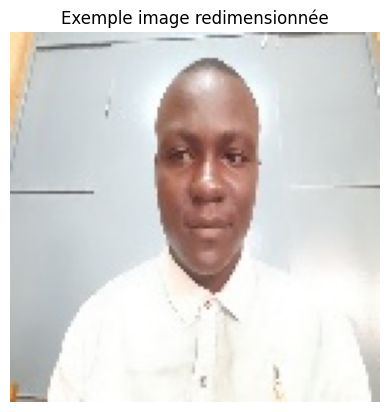

In [162]:
# ===========================================================
#  Vérification visuelle du prétraitement des images
#  Objectif : afficher un exemple d’image redimensionnée
# ===========================================================

import matplotlib.pyplot as plt  # Bibliothèque pour l’affichage graphique
import cv2                      # OpenCV pour le traitement d’images

# Chemin vers le dossier contenant les images prétraitées d’un individu (ici "Laurent")
img_path = "/content/drive/MyDrive/Projet_DeepLearning/processed_data/DJOKNONE"

# Chargement d’une image exemple (la 4e du dossier)
img = cv2.imread(os.path.join(img_path, os.listdir(img_path)[4]))

# Conversion de l’image BGR à RGB pour un affichage correct avec matplotlib
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Exemple image redimensionnée")
plt.axis('off')  # masque les axes pour une meilleure lisibilité
plt.show()

In [163]:
# ===========================================================
#  Vérification du nombre d’images par classe (personne)
#  Objectif : contrôler la répartition des données prétraitées
# ===========================================================

for person in os.listdir(output_dir):
    # Comptage du nombre de fichiers (images) dans le dossier de chaque personne
    count = len(os.listdir(os.path.join(output_dir, person)))

    # Affichage du résultat pour suivi et validation
    print(f"{person} : {count} images")

ABONDO : 18 images
BEINDI : 17 images
DEDIM : 19 images
EWOUDI : 21 images
EKWANE : 22 images
KAMATE : 20 images
KIYINDOU : 20 images
KOUMETIO : 20 images
MAMA : 20 images
MATSING : 20 images
MESSINA : 19 images
MODJARBA : 19 images
NGOUANA : 20 images
OBAMA : 15 images
OTABELA : 18 images
TCHUIDJANG : 19 images
SCHOUAME : 22 images
WAMBE : 21 images
DJOKNONE : 20 images


In [164]:
# ===========================================================
#  Chargement des images prétraitées pour l'entraînement
#  Objectif : construire les matrices X (images) et y (étiquettes)
# ===========================================================

import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Dossier contenant les images prétraitées classées par personne
data_dir = "/content/drive/MyDrive/Projet_DeepLearning/processed_data"

# Initialisation des listes pour les données et les étiquettes
X, y = [], []
labels = os.listdir(data_dir)  # Liste des classes (noms des dossiers)

# Parcours de chaque classe pour charger les images
for i, label in enumerate(labels):
    folder = os.path.join(data_dir, label)
    for file in os.listdir(folder):
        img_path = os.path.join(folder, file)
        img = cv2.imread(img_path)

        # Conversion BGR → RGB pour cohérence avec l’affichage et les modèles
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Ajout de l’image et de son étiquette dans les listes
        X.append(img)
        y.append(i)

# Conversion en tableaux NumPy pour compatibilité avec Keras/TensorFlow
X = np.array(X)
y = np.array(y)

# Normalisation des pixels (0-1) — utile si non déjà faite en amont
X = X / 255.0

# Affichage des statistiques de chargement
print(f"Total d’images : {len(X)}")
print(f"Classes détectées : {labels}")

Total d’images : 370
Classes détectées : ['ABONDO', 'BEINDI', 'DEDIM', 'EWOUDI', 'EKWANE', 'KAMATE', 'KIYINDOU', 'KOUMETIO', 'MAMA', 'MATSING', 'MESSINA', 'MODJARBA', 'NGOUANA', 'OBAMA', 'OTABELA', 'TCHUIDJANG', 'SCHOUAME', 'WAMBE', 'DJOKNONE']


In [165]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [166]:
# ===========================================================
#  Séparation des données en ensembles d'entraînement et de test
#  Objectif : préparer les données pour l’apprentissage supervisé
# ===========================================================

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Séparation aléatoire des données (80% entraînement, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Encodage one-hot des étiquettes pour compatibilité avec Keras
y_train = to_categorical(y_train, num_classes=len(labels))
y_test = to_categorical(y_test, num_classes=len(labels))

# Affichage des dimensions pour vérification
print("Taille du jeu d’entraînement :", X_train.shape)
print("Taille du jeu de test :", X_test.shape)

Taille du jeu d’entraînement : (296, 128, 128, 3)
Taille du jeu de test : (74, 128, 128, 3)


In [167]:
# ===========================================================
#  GÉNÉRATION DE DONNÉES AUGMENTÉES POUR L’ENTRAÎNEMENT
#  Objectif : enrichir le jeu d’entraînement par transformation des images
#  Reproductibilité assurée par fixation des graines aléatoires
# ===========================================================

import os, random, numpy as np, tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# -----------------------------------------------------------
#  Fixation des graines pour reproductibilité complète
# -----------------------------------------------------------
SEED = 42
os.environ['PYTHONHASHSEED'] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

# -----------------------------------------------------------
#  Création du générateur avec transformations réalistes
# -----------------------------------------------------------
datagen = ImageDataGenerator(
    rotation_range=20,           # Rotation aléatoire jusqu’à ±20°
    width_shift_range=0.15,      # Décalage horizontal jusqu’à 15%
    height_shift_range=0.15,     # Décalage vertical jusqu’à 15%
    zoom_range=0.15,             # Zoom aléatoire jusqu’à ±15%
    horizontal_flip=True,        # Retournement horizontal (utile pour les visages)
    fill_mode='nearest'          # Remplissage des pixels vides après transformation
)

# -----------------------------------------------------------
#  Générateur avec graine fixée pour reproductibilité
# -----------------------------------------------------------
train_generator = datagen.flow(X_train, y_train, batch_size=32, seed=SEED)

# -----------------------------------------------------------
#  Jeu de validation conservé tel quel pour évaluation fiable
# -----------------------------------------------------------
validation_data = (X_test, y_test)

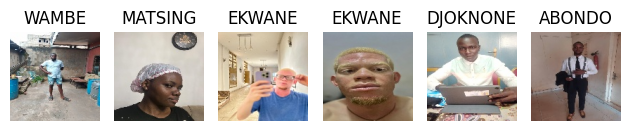

In [168]:
# ===========================================================
#  Affichage des premières images d'entraînement avec leur classe
#  Objectif : contrôle visuel de la correspondance image/étiquette
# ===========================================================

import matplotlib.pyplot as plt
import numpy as np

# Affichage des 6 premières images du jeu d'entraînement
for i in range(6):
    plt.subplot(1, 6, i + 1)  # Organisation en une seule ligne (1x5)
    plt.imshow(X_train[i])   # Affichage de l’image RGB
    label_index = np.argmax(y_train[i])  # Conversion one-hot → index de classe
    class_name = labels[label_index]     # Récupération du nom de la classe
    plt.title(class_name)                # Annotation de l’image
    plt.axis('off')                      # Suppression des axes pour lisibilité

plt.tight_layout()  # Optimisation de l’espacement entre les sous-figures
plt.show()          # Affichage final

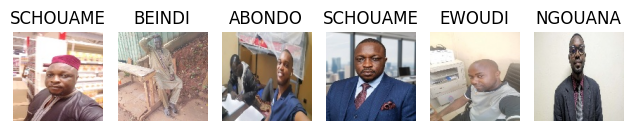

In [169]:
# ===========================================================
#  Affichage des premières images du jeu de test avec leur classe
#  Objectif : contrôle visuel de la qualité et de la cohérence des données
# ===========================================================

import matplotlib.pyplot as plt
import numpy as np

# Affichage des 6 premières images du jeu de test
for i in range(6):
    plt.subplot(1, 6, i + 1)  # Organisation en une ligne (1x6)
    plt.imshow(X_test[i])    # Affichage de l’image RGB
    label_index = np.argmax(y_test[i])  # Conversion one-hot → index de classe
    class_name = labels[label_index]    # Récupération du nom de la classe
    plt.title(class_name)               # Annotation de l’image
    plt.axis('off')                     # Suppression des axes pour lisibilité

plt.tight_layout()  # Optimisation de l’espacement entre les sous-figures
plt.show()          # Affichage final

In [170]:
# ===========================================================
#  Vérification des dimensions des ensembles d'entraînement et de test
# ===========================================================

print("Taille du jeu d’entraînement :", X_train.shape)  # (nombre d’images, hauteur, largeur, canaux)
print("Taille du jeu de test :", X_test.shape)          # (nombre d’images, hauteur, largeur, canaux)

Taille du jeu d’entraînement : (296, 128, 128, 3)
Taille du jeu de test : (74, 128, 128, 3)


In [171]:
# ===========================================================
#  Vérification et activation de l'exécution eager (TensorFlow)
#  Objectif : faciliter le débogage et l'exécution immédiate des opérations
# ===========================================================

import tensorflow as tf

# Vérifie si l'exécution eager est déjà activée
print("Eager execution activé ?", tf.executing_eagerly())

# Force l'activation de l'exécution eager si elle ne l'est pas
tf.config.run_functions_eagerly(True)

Eager execution activé ? True


In [172]:
# ===========================================================
#  CONSTRUCTION DU MODÈLE
#  Groupe de travail – Reconnaissance faciale multi-classes
#  Architecture avec régularisation L2 et Dropout renforcé
# ===========================================================

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense, LeakyReLU
from tensorflow.keras import regularizers
import os


# ===========================================================
#  FIXATION DES GRAINES POUR REPRODUCTIBILITÉ
# ===========================================================

import os
import random
import numpy as np
import tensorflow as tf

SEED = 42  # Choisis une graine fixe

os.environ['PYTHONHASHSEED'] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

# ===========================================================
#  Détection automatique du nombre de classes (personnes)
# ===========================================================
output_dir = "/content/drive/MyDrive/Projet_DeepLearning/processed_data"
num_classes = len(os.listdir(output_dir))  # Chaque sous-dossier représente une classe
print(f"Nombre de classes détectées : {num_classes}")

# ===========================================================
#  Initialisation du modèle séquentiel
# ===========================================================
model = Sequential()

# ===========================================================
#  Couche 1 : Convolution initiale + LeakyReLU + Pooling + Dropout
# ===========================================================
model.add(Input(shape=(128, 128, 3)))  # Format des images RGB redimensionnées
model.add(Conv2D(32, (3, 3), activation='linear', padding='same',
                 kernel_regularizer=regularizers.l2(0.002)))  # L2 pour limiter l’overfitting
model.add(LeakyReLU(negative_slope=0.1))  # Activation robuste aux valeurs négatives
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))  # Réduction spatiale
model.add(Dropout(0.3))  # Dropout renforcé pour régularisation

# ===========================================================
#  Couche 2 : Convolution intermédiaire + LeakyReLU + Pooling + Dropout
# ===========================================================
model.add(Conv2D(64, (3, 3), activation='linear', padding='same',
                 kernel_regularizer=regularizers.l2(0.003)))
model.add(LeakyReLU(negative_slope=0.1))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.4))

# ===========================================================
#  Couche 3 : Convolution profonde + LeakyReLU + Pooling + Dropout
# ===========================================================
model.add(Conv2D(128, (3, 3), activation='linear', padding='same',
                 kernel_regularizer=regularizers.l2(0.003)))
model.add(LeakyReLU(negative_slope=0.1))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.5))

# ===========================================================
#  Passage en vecteur pour les couches entièrement connectées
# ===========================================================
model.add(Flatten())

# ===========================================================
#  Couche Dense + LeakyReLU + Dropout
# ===========================================================
model.add(Dense(128, activation='linear',
                kernel_regularizer=regularizers.l2(0.003)))
model.add(LeakyReLU(negative_slope=0.1))
model.add(Dropout(0.4))

# ===========================================================
#  Couche de sortie : classification multi-classes
# ===========================================================
model.add(Dense(num_classes, activation='softmax'))  # Softmax pour classification exclusive

# ===========================================================
#  Compilation du modèle
# ===========================================================
model.compile(
    loss='categorical_crossentropy',  # Adapté au one-hot encoding
    optimizer='adam',                 # Optimiseur rapide et robuste
    metrics=['accuracy']              # Suivi de la performance
)

# ===========================================================
#  Affichage du résumé du modèle
# ===========================================================
model.summary()

Nombre de classes détectées : 19


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_48 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_64 (LeakyReLU)      │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_48 (MaxPooling2D) │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_64 (Dropout)            │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_49 (Conv2D)              │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_65 (LeakyReLU)      │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_49 (MaxPooling2D) │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_65 (Dropout)            │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_50 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_66 (LeakyReLU)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_50 (MaxPooling2D) │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_66 (Dropout)            │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_16 (Flatten)            │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_67 (LeakyReLU)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_67 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 19)             │         2,451 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,290,131 (16.37 MB)

 Trainable params: 4,290,131 (16.37 MB)

 Non-trainable params: 0 (0.00 B)

In [176]:
# ===========================================================
#  ENTRAÎNEMENT DU MODÈLE CNN SUR LES DONNÉES D’IMAGES
#  Objectif : apprentissage supervisé avec données augmentées
# ===========================================================


history = model.fit(
    train_generator,                       # Générateur avec augmentation (rotation, zoom, etc.)
    validation_data=validation_data,       # Jeu de test non modifié pour évaluation fiable
    epochs=50,                             # Nombre d’époques augmenté pour convergence progressive
    verbose=1,                             # Affichage détaillé de la progression
    steps_per_epoch=len(X_train) // 32     # Nombre d’itérations par époque (batch_size = 32)
)

Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.6409 - loss: 2.0437 - val_accuracy: 0.6486 - val_loss: 2.2291
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - accuracy: 0.5000 - loss: 2.2801 - val_accuracy: 0.6622 - val_loss: 2.2589
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.6840 - loss: 2.0238 - val_accuracy: 0.6757 - val_loss: 2.1051
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 162ms/step - accuracy: 0.3750 - loss: 2.5851 - val_accuracy: 0.6892 - val_loss: 2.1066
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.6997 - loss: 1.9163 - val_accuracy: 0.6216 - val_loss: 2.2879
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - accuracy: 0.5938 - loss: 2.2716 - val_accuracy: 0.6622 - val_loss: 2.2482
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.6871 - loss: 1.9448 - val_accuracy: 0.6351 - val_loss: 2.3571
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 162ms/step - accuracy: 0.5625 - loss: 2.1511 - val_accuracy: 0.6216 - val_loss: 2.3527
Ep

In [178]:
# ===========================================================
#  Sauvegarde du modèle entraîné au format HDF5 (.h5)
#  Objectif : archivage du modèle pour réutilisation ou déploiement
# ===========================================================

model.save("/content/drive/MyDrive/Projet_DeepLearning/modele_visage.h5")  # Format .h5 exigé
print("Modèle entraîné et sauvegardé avec succès !")

Modèle entraîné et sauvegardé avec succès !


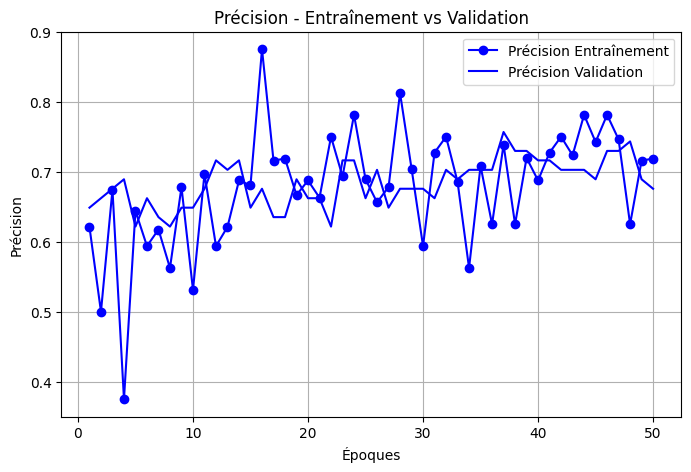

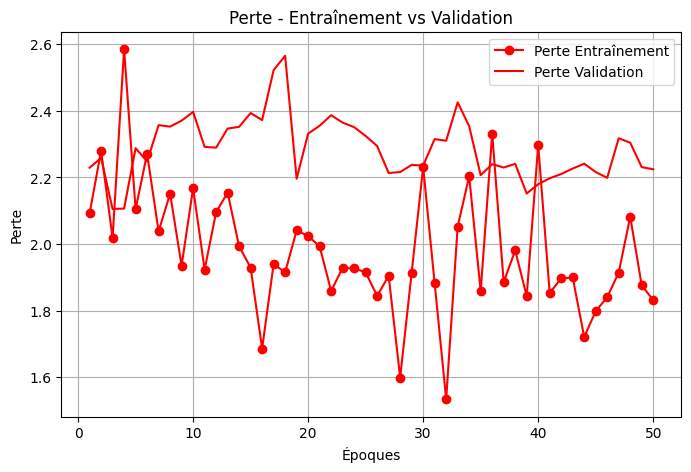

In [179]:

# ===========================================================
# Extraction des métriques pour affichage
# ===========================================================
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# ===========================================================
# Visualisation des performances
# ===========================================================
import matplotlib.pyplot as plt

epochs_range = range(1, len(train_acc) + 1)

# --- Courbe de précision ---
plt.figure(figsize=(8, 5))
plt.plot(epochs_range, train_acc, 'bo-', label='Précision Entraînement')
plt.plot(epochs_range, val_acc, 'b', label='Précision Validation')
plt.title('Précision - Entraînement vs Validation')
plt.xlabel('Époques')
plt.ylabel('Précision')
plt.legend()
plt.grid(True)
plt.show()

# --- Courbe de perte ---
plt.figure(figsize=(8, 5))
plt.plot(epochs_range, train_loss, 'ro-', label='Perte Entraînement')
plt.plot(epochs_range, val_loss, 'r', label='Perte Validation')
plt.title('Perte - Entraînement vs Validation')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()
plt.grid(True)
plt.show()

In [180]:
# ===========================================================
#  ÉVALUATION FINALE DU MODÈLE SUR LES DONNÉES DE TEST
#  Objectif : mesurer la performance réelle du modèle CNN
# ===========================================================

# Évaluation silencieuse (sans affichage de barre de progression)
test_eval = model.evaluate(X_test, y_test, verbose=0)

# -----------------------------------------------------------
#  Affichage des résultats bruts
# -----------------------------------------------------------
print("=====================================")
print("      ÉVALUATION DU MODÈLE CNN")
print("=====================================")
print(f" Test Loss (fonction de perte)     : {test_eval[0]:.4f}")
print(f" Test Accuracy (précision globale) : {test_eval[1]*100:.2f}%")
print("=====================================")

# -----------------------------------------------------------
#  Interprétation automatique du score de précision
# -----------------------------------------------------------
if test_eval[1] >= 0.9:
    print(" Excellent modèle : il reconnaît très bien les visages !")
elif test_eval[1] >= 0.75:
    print(" Bon modèle : améliorable avec plus d’images ou un réglage fin.")
else:
    print(" Modèle encore faible : pense à ajouter plus de données ou à ajuster les hyperparamètres.")

      ÉVALUATION DU MODÈLE CNN
 Test Loss (fonction de perte)     : 2.2245
 Test Accuracy (précision globale) : 67.57%
 Modèle encore faible : pense à ajouter plus de données ou à ajuster les hyperparamètres.


Fichiers disponibles : ['WhatsApp Image 2025-10-25 à 15.01.58_05800483.jpg', 'WhatsApp Image 2025-10-25 à 15.02.02_5cf803d2.jpg', 'WhatsApp Image 2025-10-25 à 15.02.06_7dd1533e.jpg', 'WhatsApp Image 2025-10-25 à 15.02.13_96e94096.jpg', 'WhatsApp Image 2025-10-25 à 15.02.15_d9eee4b2.jpg', 'WhatsApp Image 2025-10-25 à 15.02.17_7f75f997.jpg', 'WhatsApp Image 2025-10-25 à 15.02.18_805ca9b5.jpg', 'WhatsApp Image 2025-10-25 à 15.02.19_9f6978ee.jpg', 'WhatsApp Image 2025-10-25 à 15.02.19_2b2e71f1.jpg', 'WhatsApp Image 2025-10-25 à 15.02.20_35443b39.jpg', 'WhatsApp Image 2025-10-25 à 15.02.21_ddbc6961.jpg', 'WhatsApp Image 2025-10-25 à 15.02.21_0e2eb33c.jpg', 'WhatsApp Image 2025-10-25 à 15.02.22_91eaae1b.jpg', 'WhatsApp Image 2025-10-25 à 15.02.25_53378fef.jpg', 'WhatsApp Image 2025-10-25 à 15.02.26_82a1e8ec.jpg', 'WhatsApp Image 2025-10-25 à 15.02.27_88d5fd7c.jpg', 'WhatsApp Image 2025-10-25 à 15.02.28_a2e91dd6.jpg', 'WhatsApp Image 2025-10-25 à 15.02.29_b3e1ead0.jpg', 'Wha

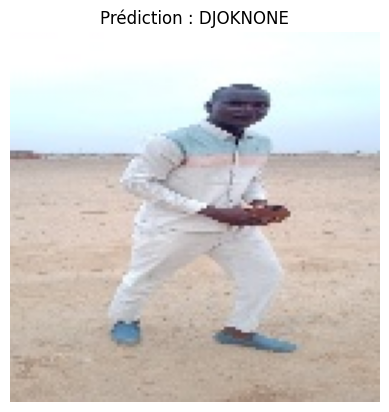

In [182]:
# ===========================================================
#  TEST DE PRÉDICTION SUR UNE IMAGE INDIVIDUELLE
#  Objectif : charger une image, appliquer le modèle CNN, afficher la classe prédite
# ===========================================================

from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
import cv2, os

# -----------------------------------------------------------
#  Chargement du modèle entraîné (.h5 )
# -----------------------------------------------------------
model = load_model("/content/drive/MyDrive/Projet_DeepLearning/modele_visage.h5")

# -----------------------------------------------------------
#  Sélection d’une image de test dans le dossier d’une classe
# -----------------------------------------------------------
img_dir = "/content/drive/MyDrive/Projet_DeepLearning/processed_data/DJOKNONE"
print("Fichiers disponibles :", os.listdir(img_dir))

# Chargement automatique d'une image du dossier
first_img = os.listdir(img_dir)[3]
img_path = os.path.join(img_dir, first_img)
print("Test sur :", img_path)

# -----------------------------------------------------------
#  Prétraitement de l’image (identique à celui du modèle)
# -----------------------------------------------------------
img = cv2.imread(img_path)
if img is None:
    raise ValueError("Impossible de lire l’image. Vérifie le chemin ou le format du fichier.")

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Conversion BGR à RGB
img = cv2.resize(img, (128, 128)) / 255.0   # Redimensionnement + normalisation

# -----------------------------------------------------------
#  Prédiction avec le modèle CNN
# -----------------------------------------------------------
pred = model.predict(np.expand_dims(img, axis=0))  # Ajout d’une dimension batch
predicted_label = labels[np.argmax(pred)]          # Conversion index en nom de classe

# -----------------------------------------------------------
#  Affichage du résultat
# -----------------------------------------------------------
plt.imshow(img)
plt.title(f"Prédiction : {predicted_label}")
plt.axis("off")
plt.show()

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 198ms/step


<Figure size 1000x800 with 0 Axes>

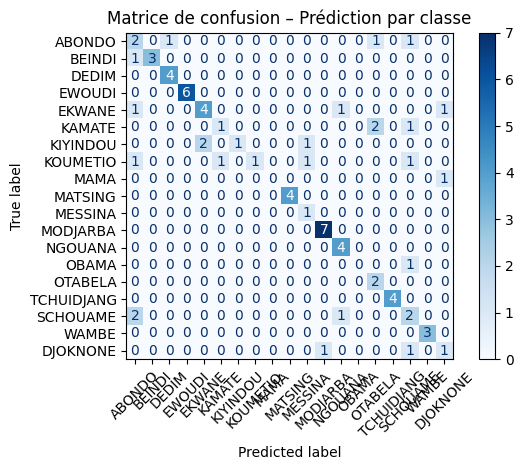

In [183]:
# ===========================================================
#  MATRICE DE CONFUSION – Évaluation par classe
# ===========================================================

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------------------------------------
#  Prédictions sur le jeu de test
# -----------------------------------------------------------
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Index des classes prédites
y_true_classes = np.argmax(y_test, axis=1)  # Index des classes réelles

# -----------------------------------------------------------
#  Génération de la matrice de confusion
# -----------------------------------------------------------
cm = confusion_matrix(y_true_classes, y_pred_classes)

# -----------------------------------------------------------
#  Affichage graphique
# -----------------------------------------------------------
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
plt.figure(figsize=(10, 8))
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Matrice de confusion – Prédiction par classe")
plt.grid(False)
plt.tight_layout()
plt.show()